Economic and Cultural Appeals of Right-Wing Populism Analysing the Impact of Economic Insecurity and Cultural Backlash in Finland

Data Analysis Code Notebook


Ignacio Valero Rodenas
ivalero@ad.helsinki.fi

This Jupyter notebook documents the process of analyzing data from the European Social Survey (ESS) Round 10 to predict the likelihood of voting for the Finnish far-right wing populist party, Perussuomalaiset. The analysis is performed using logistic regression models that consider a set of economic and sociocultural variables as predictors.

The purpose of this analysis is to understand the factors that may influence a person's decision to vote for Perussuomalaiset, which has gained significant popularity in Finland in recent years. By examining the relationships between variables and voting behavior, we can gain insights into the social and political landscape of Finland and potentially inform policy decisions.

The data used in this analysis comes from the European Social Survey, which is a cross-national survey that measures attitudes, behaviors, and values across Europe. The specific variables used in the analysis were selected based on previous research and theories related to voting behavior.

This notebook is organized into several sections that describe the data cleaning, preparation, and analysis steps in detail. Each section includes code snippets and explanations that walk through the process step-by-step. The notebook also includes visualizations to help illustrate the relationships between variables and voting behavior.

Overall, this notebook serves as a comprehensive documentation of the analysis process and can be used as a resource for future research or policy decision-making.

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the raw data
ess_df = pd.read_csv('C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/data/raw/ESS10/ESS10.csv')

# Print the first 5 rows of the dataset
print(ess_df.head())


         name  essround  edition    proddate   idno cntry   dweight   pspwght  \
0  ESS10e02_2        10      2.2  21.12.2022  10002    BG  1.939384  1.290706   
1  ESS10e02_2        10      2.2  21.12.2022  10006    BG  1.651595  1.430878   
2  ESS10e02_2        10      2.2  21.12.2022  10009    BG  0.315025  0.113172   
3  ESS10e02_2        10      2.2  21.12.2022  10024    BG  0.673037  1.436375   
4  ESS10e02_2        10      2.2  21.12.2022  10027    BG  0.394999  0.584889   

    pweight  anweight  ...                hinwe                iinwe  \
0  0.217716  0.281008  ...  2021-07-24 13:11:27  2021-07-24 13:11:35   
1  0.217716  0.311526  ...  2021-08-28 08:07:22  2021-08-28 08:07:39   
2  0.217716  0.024639  ...  2021-07-15 21:33:51  2021-07-15 21:34:36   
3  0.217716  0.312722  ...  2021-08-01 13:19:41  2021-08-01 13:20:15   
4  0.217716  0.127340  ...  2021-07-24 18:08:15  2021-07-24 18:09:09   

                 kinwe                vinwe                inwde  \
0  2021-07-2

C:\Users\innac\AppData\Local\Temp\ipykernel_4132\398622726.py:7: DtypeWarning: Columns (159,165,167,578) have mixed types. Specify dtype option on import or set low_memory=False.
  ess_df = pd.read_csv('C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/data/raw/ESS10/ESS10.csv')


Data Filtering


In [157]:
# Select subset of variables
var_list = ['uemp3m', 'agea', 'stfeco', 'hincfel', 'hincsrca', 'rlgdgr', 'edlvdfi',
            'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 
            'trstsci', 'prtvtefi', 'prtclffi', 'imbgeco', 'imueclt', 'imwbcnt', 'stfgov', 
            'stfdem', 'ipbhprp', 'impsafe', 'ipfrule', 'imptrad', 'lrscale', 'gndr', 
            'ipstrgv', 'hinctnta', 'atchctr']
#filter to only include cases from Finland
FI_df = ess_df.loc[ess_df['cntry'] == 'FI', var_list]

print(FI_df.head())

      uemp3m  agea  stfeco  hincfel  hincsrca  rlgdgr  edlvdfi  trstprl  \
8259       2    24       5        2         1       0      5.0        5   
8260       2    77       7        1         4       8     12.0        6   
8261       2    33       4        2         1       0      9.0        1   
8262       1    75       7        2         1       7      5.0        7   
8263       1    32       8        2         1      10      6.0        7   

      trstlgl  trstplc  ...  stfdem  ipbhprp  impsafe  ipfrule  imptrad  \
8259        5        5  ...       5        1        1        1        4   
8260        8        8  ...       8        4        5        3        3   
8261        5        9  ...       6        1        2        2        4   
8262        8        9  ...       7        2        1        3        5   
8263        9        9  ...       8        1        1        1        2   

      lrscale  gndr  ipstrgv  hinctnta  atchctr  
8259        5     2        4         1        9 

In [158]:
FI_df.describe()



,uemp3m,agea,stfeco,hincfel,hincsrca,rlgdgr,edlvdfi,trstprl,trstlgl,trstplc,...,stfdem,ipbhprp,impsafe,ipfrule,imptrad,lrscale,gndr,ipstrgv,hinctnta,atchctr
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,...,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000
mean,1.645529,52.609385,7.136335,1.774255,2.639188,4.769816,23.228282,6.717819,7.725428,8.388079,...,8.202917,2.941661,2.595434,3.195308,3.327838,8.578947,1.50539,2.547876,9.837032,8.832594
std,0.478504,19.323281,7.864965,0.695177,4.510401,5.440229,329.218986,4.124600,4.350748,2.510953,...,8.510186,1.368758,1.295709,1.427576,1.454799,15.266092,0.50013,1.365510,17.088919,3.614498
min,1.000000,15.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,37.000000,5.000000,1.000000,1.000000,2.000000,5.000000,5.000000,7.000000,8.000000,...,7.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.00000,2.000000,4.000000,8.000000
50%,2.000000,55.000000,7.000000,2.000000,1.000000,5.000000,7.000000,7.000000,8.000000,9.000000,...,8.000000,3.000000,2.000000,3.000000,3.000000,6.000000,2.00000,2.000000,7.000000,9.000000
75%,2.000000,69.000000,8.000000,2.000000,4.000000,7.000000,10.000000,8.000000,9.000000,9.000000,...,9.000000,4.000000,3.000000,4.000000,4.000000,8.000000,2.00000,3.000000,9.000000,10.000000
max,2.000000,90.000000,88.000000,8.000000,88.000000,88.000000,8888.000000,88.000000,88.000000,88.000000,...,88.000000,8.000000,8.000000,8.000000,8.000000,88.000000,2.00000,8.000000,88.000000,88.000000


Data Wrangling

In this section, we will perform data wrangling on the ESS Round 10 dataset for Finland. The data wrangling process will be done in blocks, and each transformation will be referenced to the main document. The goal of this data wrangling is to prepare the data for analysis by selecting relevant variables and recoding values for missing data. This will ensure that the data is clean and ready for the logistic regression models that we will build in the next sections.

Demographic Controls


For the "EducationLevel" variable, the original categories in the "edlvdfi" column are mapped into four new categories (1, 2, 3, or 4), depending on their value.
-	Category 1: respondents who completed less than elementary school or elementary school only.
-	 Category 2 : completed middle school or high school.
-	Category 3 : completed vocational school or some college
-	Category 4 : completed bachelor's, master's, doctoral, or other advanced degrees. 


For the "Religiosity" variable, the original values in the "rlgdgr" column are replaced with missing values (NA) if they are within the range of 77 to 99.

For the "Age" variable, the original values in the "agea" column are replaced with missing values (NA) if they are equal to 999.

For the "Gender" variable, the original values in the "gndr" column are mapped into 0 (F) and 1 (M)

The transformed data is then stored in the new columns "EducationLevel", "Religiosity", "Age", and "Gender", which can be used for further analysis.

In [159]:
# Education level
FI_df['EducationLevel'] = np.where(FI_df['edlvdfi'].isin(range(1, 3)), 1,
                             np.where(FI_df['edlvdfi'].isin(range(3, 6)), 2,
                             np.where(FI_df['edlvdfi'].isin(range(6, 11)), 3,
                             np.where(FI_df['edlvdfi'].isin([11, 12, 13, 14, 5555]), 4, np.nan))))


# Age
FI_df['Age'] = np.where(FI_df['agea'] == 999, np.nan, FI_df['agea'])

# Gender
FI_df['Gender_M'] = np.where(FI_df['gndr'] == 1, 1, 0)







Economic Insecurity Variables

In [166]:
# Income source
# Creating a new variable IncomeGroup based on the main source of household income
FI_df['WelfareDependent'] = np.where(FI_df['hincsrca'].isin(range(1, 4)), 0,
                          np.where(FI_df['hincsrca'].isin(range(4, 7)), 1,
                          np.where(FI_df['hincsrca'] == 7, 0,
                          np.where(FI_df['hincsrca'] == 8, 0, np.nan))))


# Income Insecurity
FI_df['SubjectiveEconomicInsecurity'] = np.where(FI_df['hincfel'].isin(range(7, 10)), np.nan, FI_df['hincfel'])

# Income Level

FI_df['IncomeLevel'] = np.where(FI_df['hinctnta'].isin(range(77, 100)), np.nan, FI_df['hinctnta'])

# Economy Satisfaction
FI_df['EconomySatisfaction'] = np.where(FI_df['stfeco'].isin(range(77, 100)), np.nan, FI_df['stfeco'])

# Employment status
FI_df['Unemployment3Months'] = np.where(FI_df['uemp3m'] == 1, 1,
                                np.where(FI_df['uemp3m'].isin(range(7, 10)), np.nan, 0))






Income source: A new variable called "IncomeSource" is created based on the main source of household income. Four groups are created based on the type of income source: Group 1 (Wages/Salaries/Self-employment/Farming), Group 2 (Welfare), Group 3 (Investments/Savings), and Group 4 (Other Sources). Values 77, 88, and 99 are treated as missing values and replaced with NaN.

Income Insecurity: A new variable called "SubjectiveEconomicInsecurity" is created to capture the level of income insecurity experienced by the household. The variable takes on the values 1-4, which correspond to the categories "Living comfortably on present income," "Coping on present income," "Difficult on present income," and "Very difficult on present income," respectively. Values 7, 8, and 9 are treated as missing values and replaced with NaN.

Income Level: A new variable called "IncomeLevel" is created to capture the household's income level. The variable is based on the household's total net income, after tax and compulsory deductions, from all sources. The variable is binned into 10 equal intervals using the cut() function, and labeled using the income_labels list. Values 77, 88, and 99 are treated as missing values and replaced with NaN.

Economy Satisfaction: A new variable called "EconomySatisfaction" is created to capture the respondent's satisfaction with the economy. The variable takes on the values 1-4, which correspond to the categories "Very satisfied," "Satisfied," "Dissatisfied," and "Very dissatisfied," respectively. Values 77, 88, and 99 are treated as missing values and replaced with NaN.

Employment status: A new variable called "Unemployment3Months" is created to capture the respondent's employment status. The variable takes on the values 1 (if the respondent has been unemployed for the past 3 months) or 0 (if the respondent has not been unemployed for the past 3 months). Values 7, 8, and 9 are treated as missing values and replaced with NaN.

By performing these transformations, the data has been preprocessed and is now ready to be used in logistic regression models.

Sociocultural Attitudes

In [194]:
# ANTI_IMMIGRATION SCALE (AIS) (0-100)
FI_df['EconomicImpactImmigration'] = np.where(FI_df['imbgeco'].isin(range(0, 11)), FI_df['imbgeco'], np.nan)
FI_df['CulturalImpactImmigration'] = np.where(FI_df['imueclt'].isin(range(0, 11)), FI_df['imueclt'], np.nan)
FI_df['OverallImpactImmigration'] = np.where(FI_df['imwbcnt'].isin(range(0, 11)), FI_df['imwbcnt'], np.nan)

FI_df['AntiImmigrationScale'] = 100 - (FI_df[['EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration']].sum(axis=1, skipna=True) / 30 * 100)

# MISTRUST_GLOBAL (0-100)
FI_df['TrustUN'] = np.where(FI_df['trstun'].isin(range(0, 11)), FI_df['trstun'], np.nan)
FI_df['TrustEuropeanParliament'] = np.where(FI_df['trstep'].isin(range(0, 11)), FI_df['trstep'], np.nan)

FI_df['Trust in International Institutions'] = FI_df[['TrustUN', 'TrustEuropeanParliament']].sum(axis=1, skipna=True) / 20 * 100

# MISTRUST_NATIONAL (0-100)
FI_df['TrustPoliticians'] = np.where(FI_df['trstplt'].isin(range(0, 11)), FI_df['trstplt'], np.nan)
FI_df['SatisfactionWithGovernment'] = np.where(FI_df['stfgov'].isin(range(0, 11)), FI_df['stfgov'], np.nan)
FI_df['SatisfactionWithDemocracy'] = np.where(FI_df['stfdem'].isin(range(0, 11)), FI_df['stfdem'], np.nan)
FI_df['TrustParliament'] = np.where(FI_df['trstprl'].isin(range(0, 11)), FI_df['trstprl'], np.nan)
FI_df['TrustPoliticalParties'] = np.where(FI_df['trstprt'].isin(range(0, 11)), FI_df['trstprt'], np.nan)

FI_df['Trust In National Institutions'] = FI_df[['TrustPoliticians', 'SatisfactionWithGovernment', 'SatisfactionWithDemocracy', 'TrustParliament', 'TrustPoliticalParties']].sum(axis=1, skipna=True) / 50 * 100

# AUTHORITARIAN VALUES (0-100)
FI_df['impsafe_model'] = np.where(FI_df['impsafe'].isin(range(0, 7)), FI_df['impsafe'], np.nan)
FI_df['ipfrule_model'] = np.where(FI_df['ipfrule'].isin(range(0, 7)), FI_df['ipfrule'], np.nan)
FI_df['ipbhprp_model'] = np.where(FI_df['ipbhprp'].isin(range(0, 7)), FI_df['ipbhprp'], np.nan)
FI_df['ipstrgv_model'] = np.where(FI_df['ipstrgv'].isin(range(0, 7)), FI_df['ipstrgv'], np.nan)
FI_df['imptrad_model'] = np.where(FI_df['imptrad'].isin(range(0, 7)), FI_df['imptrad'], np.nan)

FI_df['Authoritarian Values'] = FI_df[['impsafe_model', 'ipfrule_model', 'ipbhprp_model', 'ipstrgv_model', 'imptrad_model']].sum(axis=1, skipna=True) / 30 * 100

FI_df['LeftRightScale'] = np.where(FI_df['lrscale'].between(77, 99), np.nan, FI_df['lrscale'])

FI_df['National_attachment'] = np.where(FI_df['atchctr'].between(77, 99), np.nan, FI_df['atchctr'])



# Religiosity
FI_df['Religiosity'] = np.where(FI_df['rlgdgr'].isin(range(77, 100)), np.nan, FI_df['rlgdgr'])
 



Political Attitude Variables


Additionally, we add the politcal attitude variables. 
This includes our target variable, which takes the party voted for in the last election, and assigns 1 to those who voted for our target party, the Perussuomalaiset or True Finns (PS),and 0 otherwise.

LeftRightScale Places the individual in a 0-10 ideological scale, with higher values indicating more right-leaning ideology.

Lastly, National Attachment is a ESS measuring the reported feeling of attachment to the individuals country (0-10)

In [195]:


########TARGET VARIABLE############
FI_df['VotedPS'] = np.where(FI_df['prtvtefi'] == 5, 1, np.where(FI_df['prtvtefi'].between(66, 99), np.nan, 0))
################################################################################################################

FI_df['VotedPS'].value_counts(dropna=True)


0.0    979
1.0    133
Name: VotedPS, dtype: int64

Data Cleaning

In [196]:
# Sociocultural variables
Sociocultural_df = FI_df[['AntiImmigrationScale', 'Religiosity', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'LeftRightScale', 'National_attachment', 'CulturalImpactImmigration', 'EconomicImpactImmigration']]

# Economic variables
Economic_df = FI_df[['WelfareDependent', 'SubjectiveEconomicInsecurity', 'IncomeLevel', 'EconomySatisfaction', 'Unemployment3Months']]

# Demographic variables
Demographics_df = FI_df[['EducationLevel', 'Age', 'Gender_M']]


# Target variable
FI_df['VotedPS'] = np.where(FI_df['prtvtefi'] == 5, 1, np.where(FI_df['prtvtefi'].between(66, 99), np.nan, 0))


# Combine all variables into one dataframe
model_df = pd.concat([Demographics_df, Economic_df, Sociocultural_df, FI_df['VotedPS']], axis=1)

# Drop rows with missing values
model_df.dropna(inplace=True)
# Print sample size before and after cleaning
print("Sample size before cleaning:", len(model_df))
print("Sample size after cleaning:", len(model_df))
 


Sample size before cleaning: 1056
Sample size after cleaning: 1056


In [197]:
print(model_df.dtypes)


EducationLevel                         float64
Age                                    float64
Gender_M                                 int32
WelfareDependent                       float64
SubjectiveEconomicInsecurity           float64
IncomeLevel                            float64
EconomySatisfaction                    float64
Unemployment3Months                    float64
AntiImmigrationScale                   float64
Religiosity                            float64
Trust in International Institutions    float64
Trust In National Institutions         float64
Authoritarian Values                   float64
LeftRightScale                         float64
National_attachment                    float64
CulturalImpactImmigration              float64
EconomicImpactImmigration              float64
VotedPS                                float64
dtype: object


DESCRIPTIVE STATISTICS: DEMOGRAPHICS

In [198]:
print(model_df['Gender_M'].value_counts())
print(model_df['EducationLevel'].value_counts())
print(model_df['Age'].describe())



0    537
1    519
Name: Gender_M, dtype: int64
3.0    413
2.0    341
4.0    229
1.0     73
Name: EducationLevel, dtype: int64
count    1056.000000
mean       55.088068
std        17.669928
min        20.000000
25%        41.000000
50%        57.000000
75%        70.000000
max        90.000000
Name: Age, dtype: float64


DESCRIPTIVES: ECONOMIC VARIABLES

In [199]:
print("WelfareDependent")
print(model_df['WelfareDependent'].value_counts())
print("\n")

print("SubjectiveEconomicInsecurity")
print(model_df['SubjectiveEconomicInsecurity'].describe())
print("\n")

print("IncomeLevel")
print(model_df['IncomeLevel'].describe())
print(model_df['IncomeLevel'].value_counts())
print("\n")

print("EconomySatisfaction")
print(model_df['EconomySatisfaction'].describe())
print("\n")

print("Unemployment3Months")
print(model_df['Unemployment3Months'].value_counts())
print("\n")


WelfareDependent
0.0    641
1.0    415
Name: WelfareDependent, dtype: int64


SubjectiveEconomicInsecurity
count    1056.000000
mean        1.725379
std         0.638689
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: SubjectiveEconomicInsecurity, dtype: float64


IncomeLevel
count    1056.000000
mean        6.289773
std         2.655109
min         1.000000
25%         4.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: IncomeLevel, dtype: float64
9.0     176
8.0     139
6.0     131
7.0     125
5.0     107
10.0    103
4.0      88
2.0      73
1.0      60
3.0      54
Name: IncomeLevel, dtype: int64


EconomySatisfaction
count    1056.000000
mean        6.458333
std         1.786247
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: EconomySatisfaction, dtype: float64


Unemployment3Months
0.0    702
1.0    354
Name: Unemployment3Months, dty

DESCRIPTIVES: SOCIOCULTURAL VARIABLES

In [200]:
model_df[['AntiImmigrationScale','CulturalImpactImmigration', 'EconomicImpactImmigration', 'Religiosity', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'LeftRightScale', 'National_attachment']].describe()


,AntiImmigrationScale,CulturalImpactImmigration,EconomicImpactImmigration,Religiosity,Trust in International Institutions,Trust In National Institutions,Authoritarian Values,LeftRightScale,National_attachment
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,33.753157,7.434659,6.427083,4.703598,62.125947,64.147727,47.332702,5.704545,8.826705
std,17.513780,1.858882,2.123751,2.975767,18.471247,15.862470,14.178892,2.353543,1.303036
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,23.333333,7.000000,5.000000,2.000000,50.000000,56.000000,36.666667,4.000000,8.000000
50%,30.000000,8.000000,7.000000,5.000000,65.000000,68.000000,46.666667,6.000000,9.000000
75%,43.333333,9.000000,8.000000,7.000000,75.000000,76.000000,56.666667,8.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,100.000000,96.000000,100.000000,10.000000,10.000000


PLOTS AND GRAPHS

c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Count')

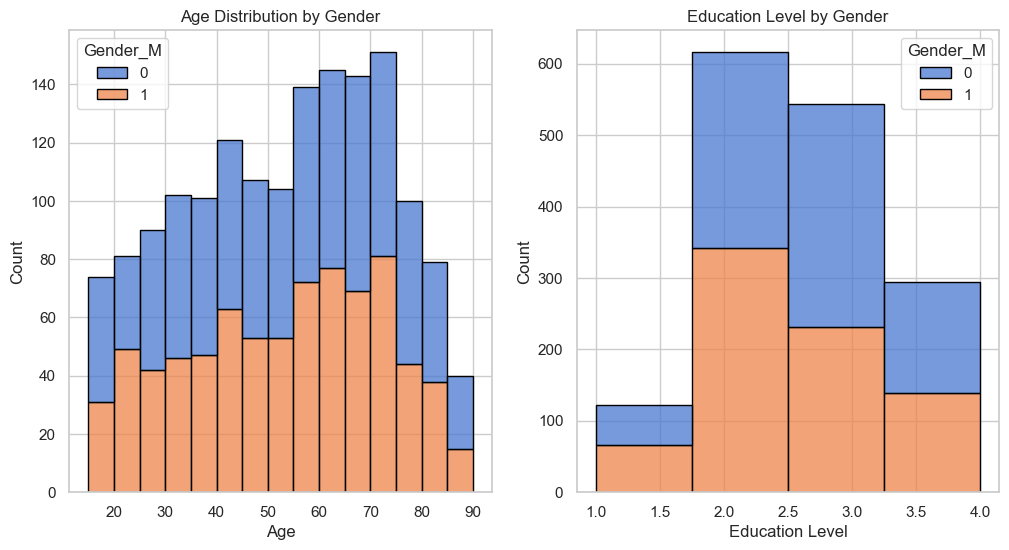

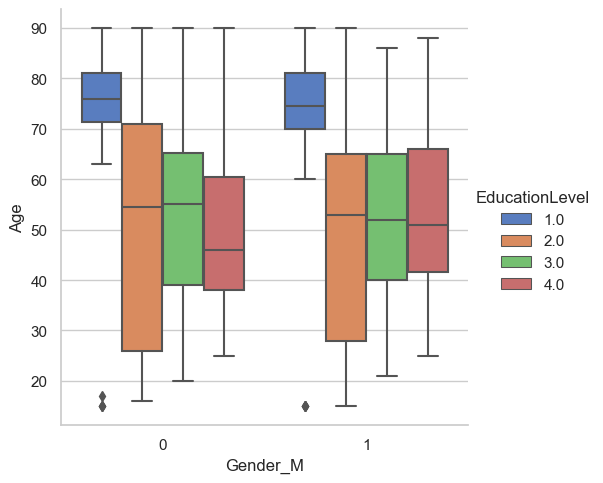

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set(style='whitegrid', palette='muted')

# Set up figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms for Age by Gender and EducationLevel by Gender
sns.histplot(ax=axs[0], data=Demographics_df, x='Age', hue='Gender_M', multiple='stack', binwidth=5, edgecolor='black')
sns.histplot(ax=axs[1], data=Demographics_df, x='EducationLevel', hue='Gender_M', multiple='stack', edgecolor='black', bins=4)

# Set titles and labels
axs[0].set_title('Age Distribution by Gender')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[1].set_title('Education Level by Gender')
axs[1].set_xlabel('Education Level')
axs[1].set_ylabel('Count')

# Plot age distribution by gender and education level
sns.catplot(ax=axs[0], data=Demographics_df, kind='box', x='Gender_M', y='Age', hue='EducationLevel', palette='muted')

# Set title and labels
axs[0].set_title('Age Distribution by Gender')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')


MODEL A

In [202]:

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationLevel', 'Gender_M', 'Age']

# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_a = logit_model.fit()
print(model_a.summary())

# Print odds ratios
params = model_a.params
conf_int = model_a.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])


Optimization terminated successfully.
         Current function value: 0.340125
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1056
Model:                          Logit   Df Residuals:                     1052
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                 0.05981
Time:                        14:20:26   Log-Likelihood:                -359.17
converged:                       True   LL-Null:                       -382.02
Covariance Type:            nonrobust   LLR p-value:                 6.578e-10
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2901      0.511      0.568      0.570      -0.711       1.291
EducationLevel   

Model A:

The model tested the association between voting for the True Finns (PS) and demographic variables (education level, gender, and age). The results showed that education level (b = -0.619, p < .001), gender (b = 0.622, p = .002), and age (b = -0.019, p < .001) were all significant predictors of voting for the True Finns (PS). Specifically, individuals with lower education levels, males, and older individuals were more likely to vote for the True Finns (PS).

The logistic regression model showed that Education Level, Gender, and Age were significant predictors of voting for PS, while Religiosity was not. Specifically, Education Level was negatively associated with the probability of voting for PS (β = -0.66, p < 0.001), Gender was positively associated with the probability of voting for PS (β = 0.61, p = 0.003), and Age was negatively associated with the probability of voting for PS (β = -0.02, p = 0.001). The model had a pseudo R-squared of 0.06, indicating that the predictors explained a small proportion of the variance in the target variable. The odds ratios (ORs) indicated that, holding all other predictors constant, a one-unit increase in Education Level decreased the odds of voting for PS by 48%, while a one-unit increase in Age decreased the odds of voting for PS by 2%. 

MODEL B: ECONOMIC INSECURITY VARIABLES

In [203]:
import statsmodels.api as sm

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationLevel', 'Gender_M', 'Age', 'EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_b = logit_model.fit()
print(model_b.summary())

# Print odds ratios
params = model_b.params
conf_int = model_b.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])


Optimization terminated successfully.
         Current function value: 0.322157
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1056
Model:                          Logit   Df Residuals:                     1049
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.1095
Time:                        14:20:29   Log-Likelihood:                -340.20
converged:                       True   LL-Null:                       -382.02
Covariance Type:            nonrobust   LLR p-value:                 6.298e-16
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.1631      0.744      1.563      0.118

Model B is a logistic regression model that includes demographics and several economic variables, including SubjectiveEconomicInsecurity, as predictors of voting behavior. The model shows that EducationLevel (B=-0.63, p<.001), Gender_M (B=0.57, p=.007), EconomySatisfaction (B=-0.25, p<.001), and WelfareDependent (B=-0.89, p=.001) are significant predictors of voting behavior. However, SubjectiveEconomicInsecurity (B=0.13, p=.422) and Age (B=-0.004, p=.523) are not significant predictors of voting behavior. The model has a pseudo R-squared of 0.1095 and is statistically significant (LLR p<.001).

MODEL C: SOCIOECONOMIC VARIABLES

In [204]:
import statsmodels.api as sm

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationLevel', 'Gender_M', 'Age', 'Religiosity', 'EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent', 'National_attachment', 'LeftRightScale', 'Authoritarian Values', 'Trust In National Institutions', 'AntiImmigrationScale', 'CulturalImpactImmigration', 'EconomicImpactImmigration']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_c = logit_model.fit()
print(model_c.summary())


# Print odds ratios
params = model_c.params
conf_int = model_c.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])

Optimization terminated successfully.
         Current function value: 0.255911
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1056
Model:                          Logit   Df Residuals:                     1041
Method:                           MLE   Df Model:                           14
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.2926
Time:                        14:20:35   Log-Likelihood:                -270.24
converged:                       True   LL-Null:                       -382.02
Covariance Type:            nonrobust   LLR p-value:                 8.168e-40
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.4748      2.797     -1.957     

MODEL D: INTERACTIONS

In [205]:
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationLevel', 'Gender_M', 'Age', 'Religiosity', 'EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent', 'National_attachment', 'LeftRightScale', 'Authoritarian Values', 'Trust In National Institutions', 'AntiImmigrationScale', 'CulturalImpactImmigration', 'EconomicImpactImmigration']

# Create interaction terms between AntiImmigrationScale and Economic Insecurity, and between Authoritarian Values and Economic Insecurity
model_df['AntiImmigration_EconInsecurity'] = model_df['AntiImmigrationScale'] * model_df['SubjectiveEconomicInsecurity']
model_df['Authoritarian_EconInsecurity'] = model_df['Authoritarian Values'] * model_df['SubjectiveEconomicInsecurity']
model_df['CulturalImpact_EconInsecurity'] = model_df['CulturalImpactImmigration'] * model_df['SubjectiveEconomicInsecurity']
# Create the logistic regression model with interaction terms
X = sm.add_constant(model_df[predictors + ['AntiImmigration_EconInsecurity', 'Authoritarian_EconInsecurity', 'CulturalImpact_EconInsecurity']])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_d = logit_model.fit()
print(model_d.summary())

# Print odds ratios
params = model_d.params
conf_int = model_d.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])


Optimization terminated successfully.
         Current function value: 0.252902
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1056
Model:                          Logit   Df Residuals:                     1038
Method:                           MLE   Df Model:                           17
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.3009
Time:                        14:27:06   Log-Likelihood:                -267.06
converged:                       True   LL-Null:                       -382.02
Covariance Type:            nonrobust   LLR p-value:                 2.577e-39
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -13.4693      4.449     -3.028     